# Método de Bisección.

El método de bisección es un método numérico capaz de encontrar las raices de una función de una variable mediante aproximaciones a la raiz.

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
jtplot.style(ticks=True, grid=True, figsize=(15, 7))

Para lograr que el código funcione, necesitamos comprobar que nuestra función $f(x)$ es continua en un intervalo $[a,x]$. Para esto, primero daremos un ejemplo base, la función $f(x)=x^2+4x-4$. ¿Como se ve nuestra función en un intervalo $[-10,10]$?

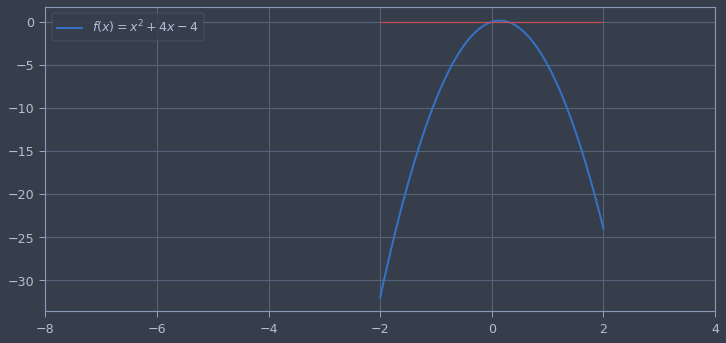

In [35]:
def txt(x,f,Ix):
	t1=open("funcion1.txt","w")

	for i in range(0,Ix):
		t1.write(str(x[i])); t1.write(" "); t1.write(str(f[i]))
		t1.write("\n")

	t1.close()

def prueba(x,f):
    plt.figure()
    plt.plot(x,f,lw=2,label='$f(x)=x^2+4x-4$')
    y=np.zeros(len(x))
    for i in range(0,len(x)):
        y[i]=0
    plt.plot(x,y,'r')
    plt.xlim(-8,4)
    plt.legend()
    plt.show()
x=np.linspace(-2,2,60)
f=-7*x**2+2*x


prueba(x,f)
archivo=txt(x,f,60)

Vemos que nuestra función es efectivamente continua en el intervalo $[-10,10]$. Ahora, tambien notamos que la linea roja es nuestro eje con $y=0$. Podemos ver que existen dos puntos en donde nuestra función se intersecta con el eje $y=0$. Esos dos puntos, son las raíces de nuestra función. 

Existen dos opciones para encontrar esos puntos. La primera de ellas es utilizando la formula general para polinomios de segundo orden, y la otra opción es utilizando el método de Bisección. Primero, programaremos la formula general para obtener los valores. 

In [3]:
%%time
def general(a,b,c):
    d=np.sqrt(b**2-4*a*c)
    
    return (-b+d)/(2*a),(-b-d)/(2*a)

x1,x2=general(a=1,b=4,c=-4)
print('Las raices son x1={} y x2={}'.format(x1,x2))

Las raices son x1=0.8284271247461903 y x2=-4.82842712474619
CPU times: user 0 ns, sys: 3.92 ms, total: 3.92 ms
Wall time: 3.84 ms


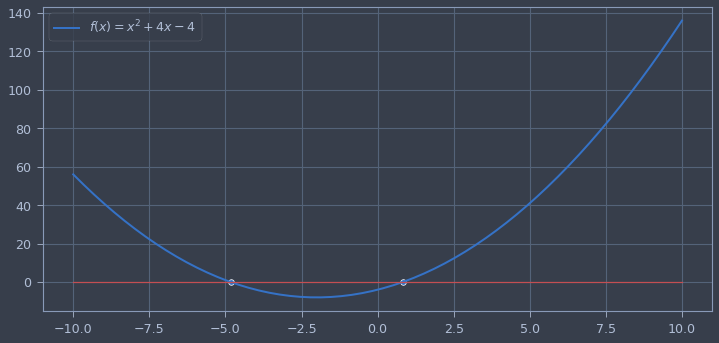

In [4]:
def checar(x,f,x1,x2):
    p=[x1,x2]
    plt.figure()
    plt.plot(x,f,lw=2,label='$f(x)=x^2+4x-4$')
    y=np.zeros(len(x))
    for i in range(0,len(x)):
        y[i]=0
    plt.plot(x,y,'r')
    sns.scatterplot(p,[0,0])
    plt.legend()
    plt.show()
checar(x,f,x1,x2)

La encontramos los puntos para $x_1$ y $x_2$, las dos raíces de nuestra funcion $f(x)$. Tambien vimos el tiempo de ejecución si programamos la formula general, el cual es de $\approx265\mu s$. Es hora de programar el método de bisección y ver su función.

In [38]:
def funcion(x):
    return -7*x**2+2*x

def biseccion(a,c):
    dx=c-a
    n=0
    t1=open('valores1.txt','w')
    t1.write('Pasos dados'); t1.write(' & '); 
    t1.write('Aproximación $c$');  t1.write(' & ')
    t1.write('Valor $|b-a|$');t1.write('\\\\ \midrule');t1.write("\n")
    while(abs(dx)>1e-4):
        b=(a+c)/2.0
        if ((funcion(a)*funcion(b))<0.0):
            c=b
            dx=c-a
        else:
            a=b
            dx=c-a
        n+=1
        t1.write('$');t1.write(str(n));t1.write('$'); t1.write(' & '); 
        t1.write('$');t1.write(str(b));t1.write('$');  t1.write(' & ')
        t1.write('$');t1.write(str(dx));t1.write('$'); 
        t1.write('\\\\ \midrule');t1.write("\n")
        #print(n,b,dx)
    t1.close()
    return b

Ahora, probamos el código. Primeramente, escogeremos $a=-7.5$ y $c=-2.5$. Veamos que tal funciona el código para encontrar la raíz $x_1$.

In [42]:
%%time
bx1=biseccion(a=0.1,c=0.3)
#bx2=biseccion(a=-7.5,c=-2.5)
#print('La raíz x1 es:',bx1)
#print('La raiz x2 es:',bx2)

CPU times: user 0 ns, sys: 1.41 ms, total: 1.41 ms
Wall time: 1.19 ms


Ahora, podemos observar el error que maneja este método con los valores obtenidos mediante la formula general.

In [7]:
error1=abs((x1-bx1)/x1)*100
error2=abs((x2-bx2)/x2)*100

print('Los errores de calculo para x1 y x2 son:')
print(error1, error2)

Los errores de calculo para x1 y x2 son:
2.25110407469652e-06 1.311143934151186e-06
